In [259]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization

import seaborn as sns

# Importing the dataset

dataset = pd.read_csv(r'C:\Users\uset\Desktop\electronics.csv')

# list of first five rows

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [260]:
# shape

dataset.shape

(1292954, 10)

In [261]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


We can see that the columns User ID and Rating are of int64 data type, while the columns Product ID and Category are of object data type.

We can also see that there are no null values in the dataset.

We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

We can convert it to a timestamp using the following code:

In [262]:
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

We can also see that the some columns are of object data type, but they are actually a string.

We can convert them to a string using the following code:

In [263]:
dataset['brand'] = dataset['brand'].astype(str)

In [264]:
dataset['category'] = dataset['category'].astype(str)

In [265]:
dataset['rating'] = dataset['rating'].astype(float)

In [266]:
dataset['user_id'] = dataset['user_id'].astype(str)

In [267]:
dataset['item_id'] = dataset['item_id'].astype(str)

In [268]:
dataset['rating'] = dataset['rating'].astype(float)

To get a better understanding of the dataset, we can also see the statistical summary of the dataset.

In [269]:
dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [270]:
# We can also see the number of unique users and items in the dataset.

dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [271]:
dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [272]:
dataset = dataset[dataset['brand'] != 'nan']

In [273]:
dataset.duplicated().sum()

0

In [274]:
dataset['rating'].value_counts()

5.0    191386
4.0     57318
1.0     35521
3.0     26327
2.0     20568
Name: rating, dtype: int64

In [275]:
# what was the best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

2015    74306
2016    66105
2014    46740
2017    45574
2013    26785
2018    18980
2012    12726
2011     9277
2010     8302
2009     6435
2008     5408
2007     4366
2006     1918
2005     1767
2004     1019
2003      669
2002      371
2001      293
2000       77
1999        2
Name: year, dtype: int64

In [276]:
# what was the best month of sales

dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

1     37092
12    33099
3     29464
2     28755
8     28082
7     27370
6     24910
4     24902
5     24805
9     24483
11    24394
10    23764
Name: month, dtype: int64

In [277]:
# drop all null values

dataset.dropna(inplace=True)

# check for missing values

dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

# EDA

<Axes: xlabel='rating', ylabel='count'>

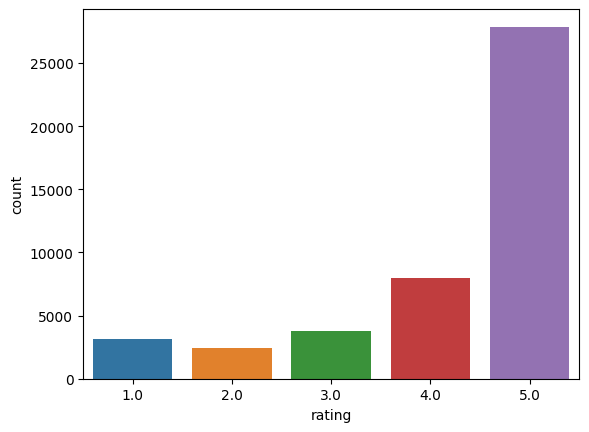

In [278]:
# the distribution of ratings 

sns.countplot(x='rating', data=dataset)

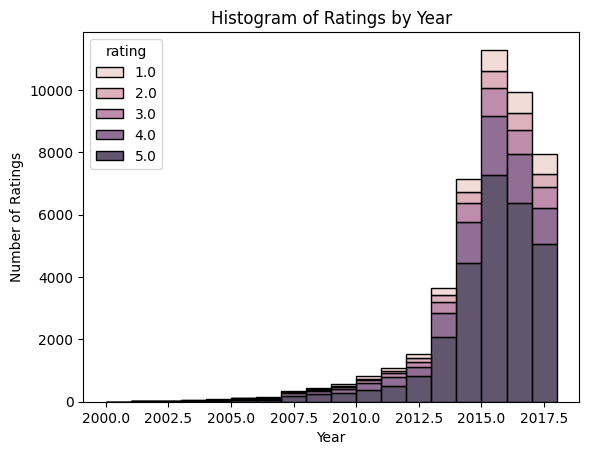

In [279]:
# Convert the 'timestamp' column to a datetime object and extract the year
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

# Group the dataset by year and count the number of ratings in each year
rating_counts = dataset.groupby('year')['rating'].count()

# Plot a histogram of the ratings vs. year
sns.histplot(data=dataset, x='year', hue='rating', multiple='stack', bins=range(min(rating_counts.index), max(rating_counts.index)+1))

# Set the plot title and axis labels
plt.title('Histogram of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')

# Show the plot
plt.show()



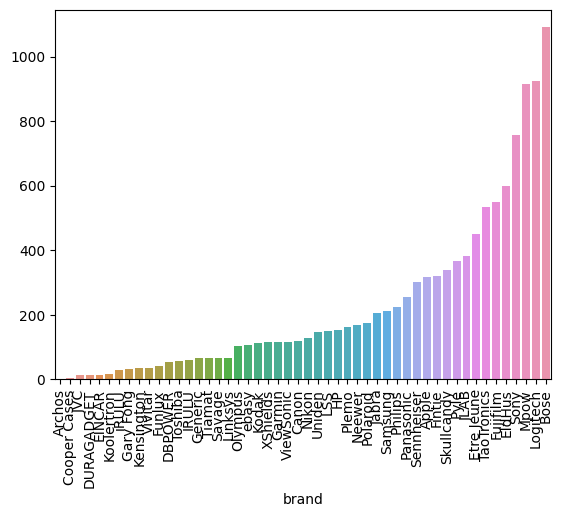

In [280]:
# what brand sold the most in 2015

dataset_2015 = dataset[dataset['year'] == 2015]
rating_counts_2015 = dataset_2015.groupby('brand')['rating'].count().sort_values()
sns.barplot(x=rating_counts_2015.index, y=rating_counts_2015.values)
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='brand'>

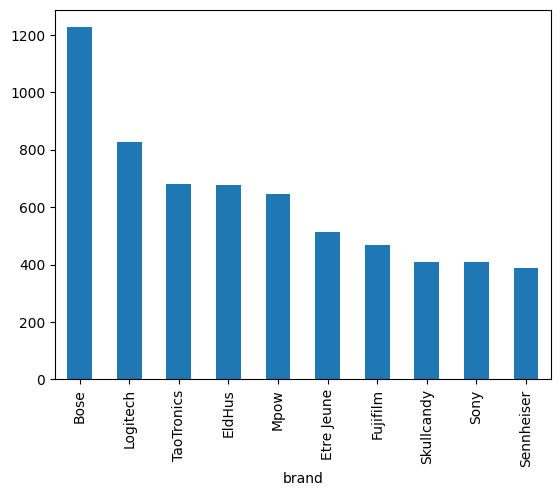

In [281]:
# what product sold the most in 2016

dataset[dataset['year'] == 2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

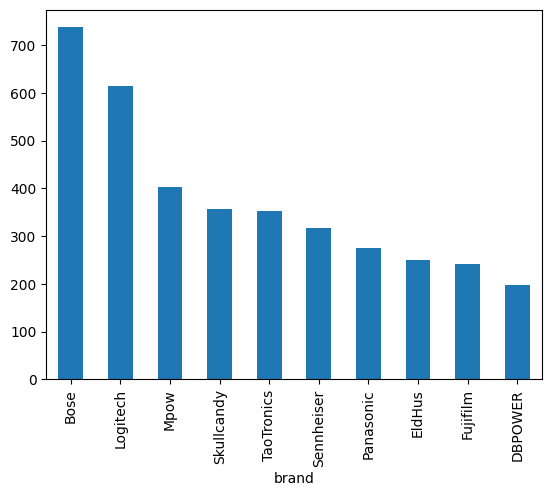

In [282]:
# what product sold the most in 2017

dataset[dataset['year'] == 2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

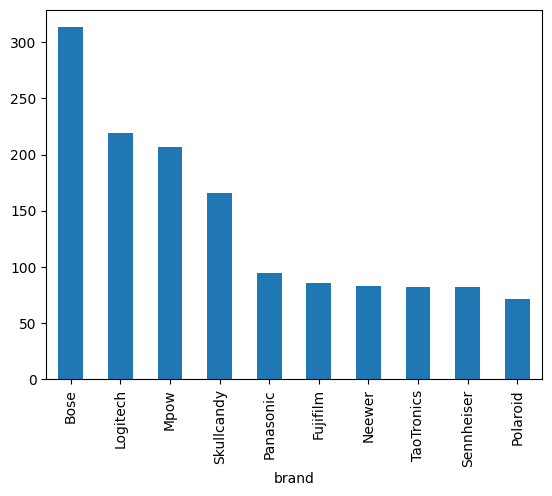

In [283]:
# what product sold the most in 2018

dataset[dataset['year'] == 2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='month'>

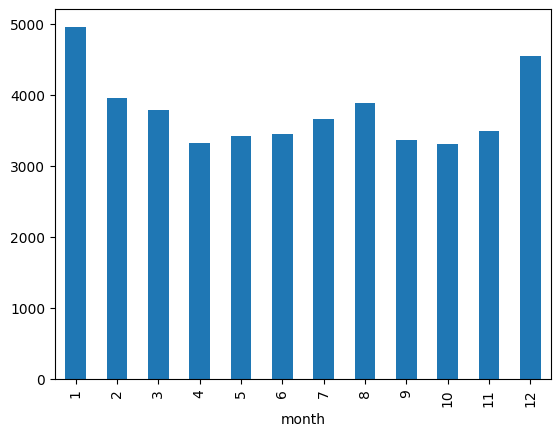

In [284]:
# We can see that the year 2015 had the best sales.

# what was the best month of sales

dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset.groupby('month')['rating'].count().plot(kind='bar')

The month of January had the best sales.

<Axes: xlabel='brand'>

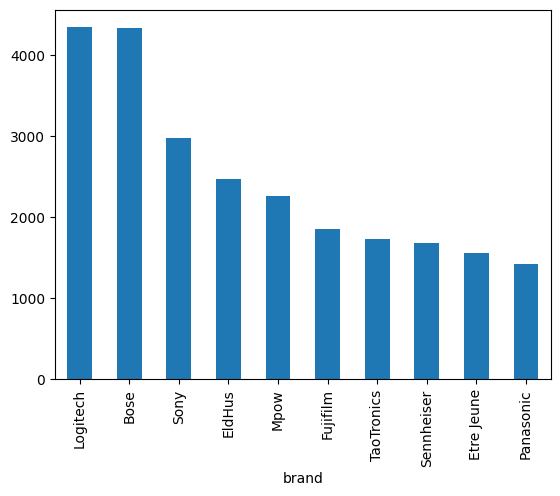

In [285]:
# What product by brand name sold the most?


dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='category'>

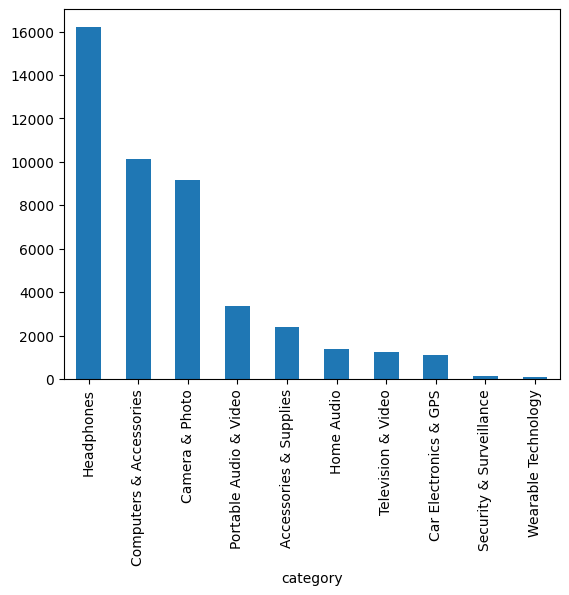

In [286]:
# What product by category sold the most?

dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: ylabel='rating'>

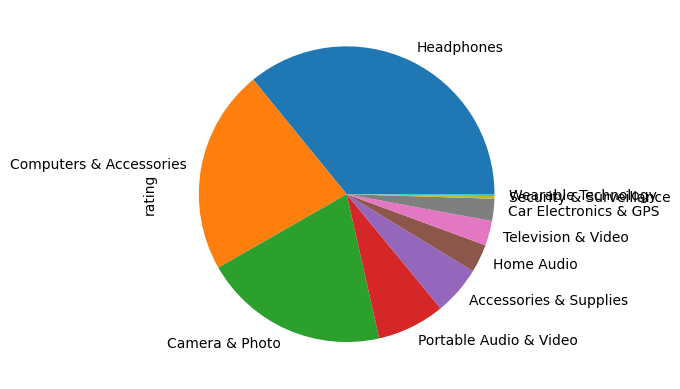

In [287]:
# category percentage sales

dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

<Axes: ylabel='rating'>

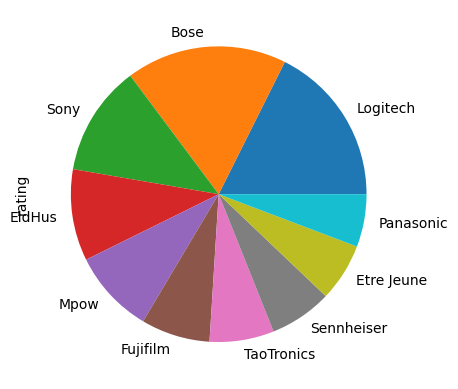

In [288]:
# brand percentage sales

dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')   

conclusion of our analysis

We can see that the year 2015 had the best sales.

The month of January had the best sales.

We can see that the brands Bose and Logitech sold the most

We can see that the category of Headphones sold the most.

We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

We can see that the category of Security and Surveillance sold the least.